<a href="https://colab.research.google.com/github/shreshyy/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset from Sklearn

In [70]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [71]:
print(dataset['target_names'])

['malignant' 'benign']


In [72]:
print(dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Dataset description

In [73]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Dataframe of dataset

In [74]:
cancer_df = pd.DataFrame(np.c_[dataset['data'],dataset['target']], columns = np.append(dataset['feature_names'],['target']))
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Data Visulaisation

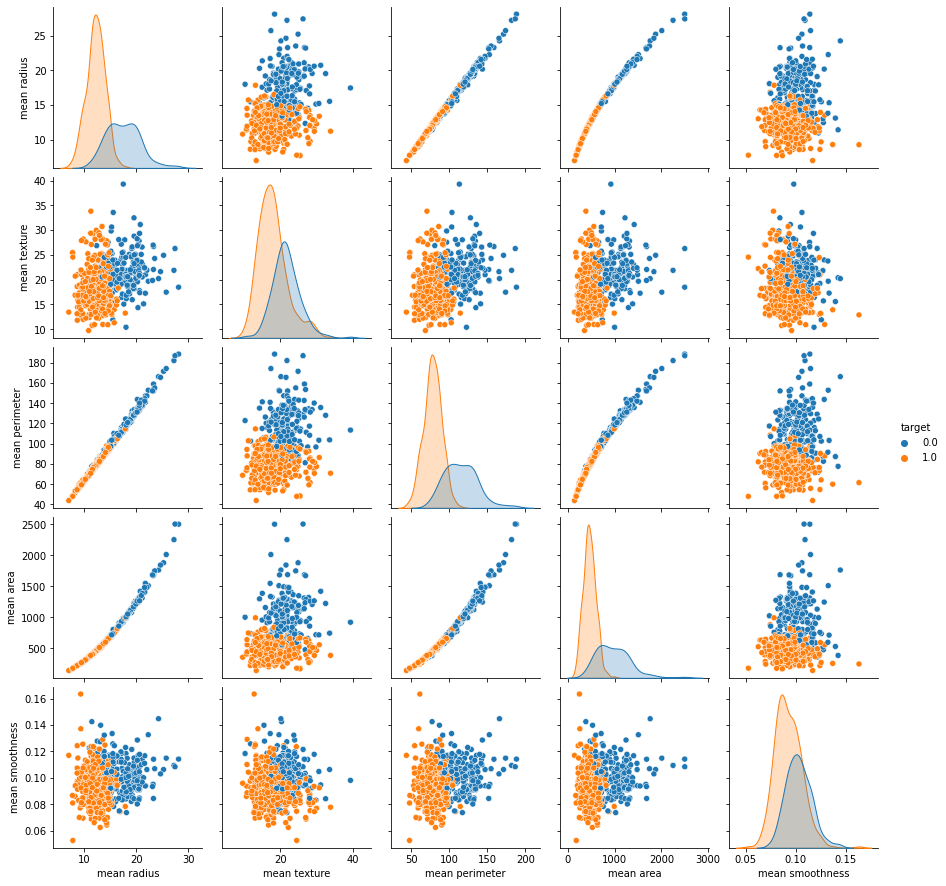

In [75]:
sns.pairplot(cancer_df , hue='target',vars= ['mean radius' ,'mean texture' ,'mean perimeter', 'mean area','mean smoothness'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


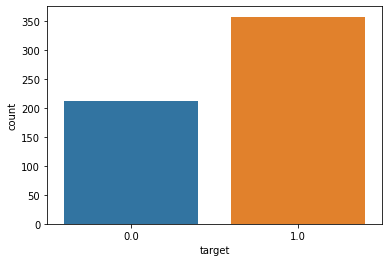

In [76]:
sns.countplot(cancer_df['target'])

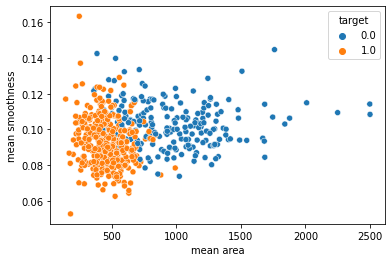

In [77]:
sns.scatterplot(x= 'mean area',y='mean smoothness' ,hue='target',data = cancer_df)

Correlation of features

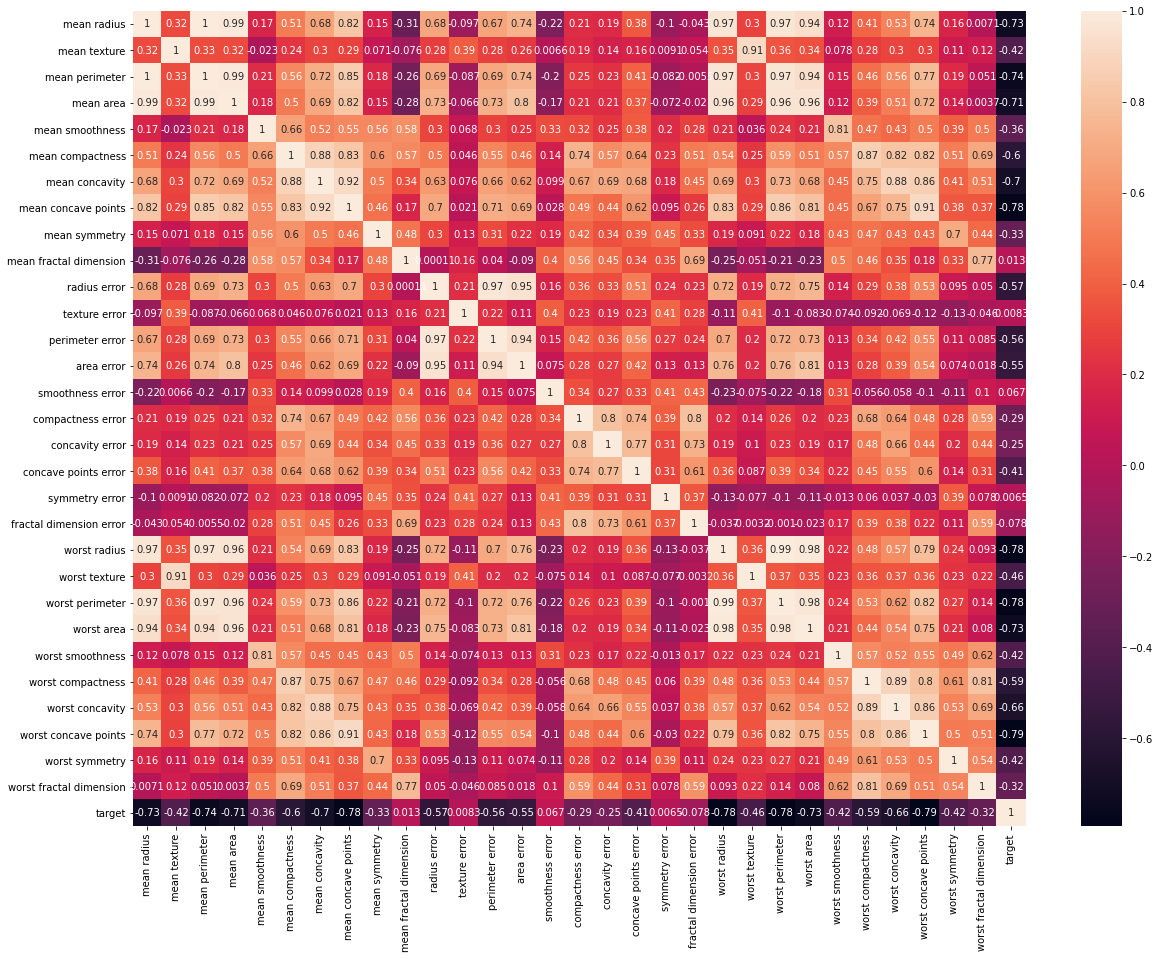

In [78]:
plt.figure(figsize= (20,15))
sns.heatmap(cancer_df.corr(),annot = True)

In [79]:
x = cancer_df.iloc[:,:-1].values
y = cancer_df.iloc[:,-1].values

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [81]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
svm_y_pred = svm_classifier.predict(x_test)

R2 Score  0.7115643209323175

Classification Report               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91        46
         1.0       0.99      0.92      0.95        97

    accuracy                           0.94       143
   macro avg       0.92      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143


RMSE  0.25087260300212727

Accuracy 0.9370629370629371



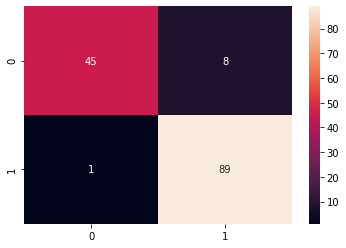

In [83]:
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,r2_score,confusion_matrix
print('R2 Score ',r2_score(svm_y_pred,y_test))
print()
print('Classification Report',classification_report(svm_y_pred,y_test))
print()
print('RMSE ',np.sqrt(mean_squared_error(y_test,svm_y_pred)))
print()
print('Accuracy',accuracy_score(y_test,svm_y_pred))
cm = confusion_matrix(y_test,svm_y_pred)
sns.heatmap(cm,annot = True)
print()


Normalisation

In [84]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
x_train_scaled = transformer.fit_transform(x_train)
x_test_scaled = transformer.transform(x_test)

In [85]:
from sklearn.svm import SVC
svm_1_classifier = SVC()
svm_1_classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
svm_1_y_pred = svm_1_classifier.predict(x_test_scaled)

R2 Score  0.3907268170426065

Classification Report               precision    recall  f1-score   support

         0.0       0.70      0.97      0.81        38
         1.0       0.99      0.85      0.91       105

    accuracy                           0.88       143
   macro avg       0.84      0.91      0.86       143
weighted avg       0.91      0.88      0.89       143


RMSE  0.3447914135838056

Accuracy 0.8811188811188811



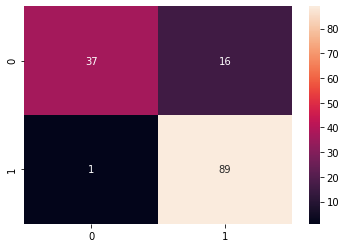

In [87]:
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,r2_score,confusion_matrix
print('R2 Score ',r2_score(svm_1_y_pred,y_test))
print()
print('Classification Report',classification_report(svm_1_y_pred,y_test))
print()
print('RMSE ',np.sqrt(mean_squared_error(y_test,svm_1_y_pred)))
print()
print('Accuracy',accuracy_score(y_test,svm_1_y_pred))
cm = confusion_matrix(y_test,svm_1_y_pred)
sns.heatmap(cm,annot = True)
print()

Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1_scaled = sc.fit_transform(x_train)
x_test1_scaled = sc.transform(x_test)

In [89]:
from sklearn.svm import SVC
svm_2_classifier = SVC()
svm_2_classifier.fit(x_train1_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

R2 Score  0.8489010989010989

Classification Report               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        52
         1.0       0.98      0.97      0.97        91

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143


RMSE  0.18698939800169145

Accuracy 0.965034965034965



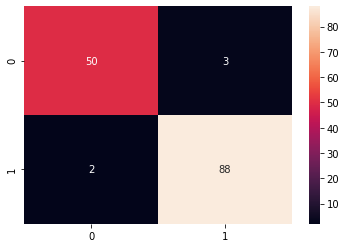

In [90]:
svm_2_y_pred = svm_2_classifier.predict(x_test1_scaled)
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,r2_score,confusion_matrix
print('R2 Score ',r2_score(svm_2_y_pred,y_test))
print()
print('Classification Report',classification_report(svm_2_y_pred,y_test))
print()
print('RMSE ',np.sqrt(mean_squared_error(y_test,svm_2_y_pred)))
print()
print('Accuracy',accuracy_score(y_test,svm_2_y_pred))
cm = confusion_matrix(y_test,svm_2_y_pred)
sns.heatmap(cm,annot = True)
print()

GridSearchCV on feature scaled X

In [91]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train1_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.919, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.706, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [92]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [93]:
y_grid_pred = grid.predict(x_test1_scaled)

R2 Score  0.9093406593406593

Classification Report               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        52
         1.0       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


RMSE  0.14484136487558028

Accuracy 0.9790209790209791



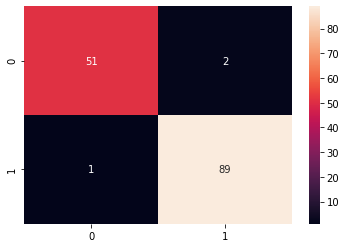

In [94]:
print('R2 Score ',r2_score(y_grid_pred,y_test))
print()
print('Classification Report',classification_report(y_grid_pred,y_test))
print()
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_grid_pred)))
print()
print('Accuracy',accuracy_score(y_test,y_grid_pred))
cm = confusion_matrix(y_test,y_grid_pred)
sns.heatmap(cm,annot = True)
print()